In [52]:
import pyloudness as ld
import numpy as np
import librosa
import librosa.display
import glob
import matplotlib.pyplot as plt

class Sound(object):

    # Constructor
    def __init__(self, path = None, extension = None):
        self.raw = []               # Get sound data
        self.path = path            # Get data path
        self.extension = extension  # Get data extension
        self.dataNames = glob.glob(self.path + "*." + self.extension)  # Make name package
        self.dataNum = self.dataNames.__len__() # Get data number
        print("Data path: ", self.path)        # For debugging
        print("Extension: ", self.extension)   # For debugging
        print("Data number: ", self.dataNum)   # For debugging

    # Show data
    def _showData(self, data, title):
        plt.figure(1)
        plt.title(title)
        plt.plot(data)
        plt.show()
    # Load raw data & attach to one chunk
    def load(self):
        for i in range(self.dataNum):
            buf, self.sr = librosa.load(self.dataNames.pop(0))  # Get raw data and sampling rate
            self.raw.append(buf)    # Collect data as one array
        print("Data names: ", self.dataNames)   # For debugging
        print("Raw data set: ", self.raw)       # For debugging
        print("Sampling Rate: ", self.sr)       # For debugging

    # Cut data using sampling rate
    def dataCutting(self):
        self.cutSound = []
        # data is cut by Sampling Rate multiple
        for i in range(self.dataNum):
            tmp = len(self.raw[i])
            self.cutting = 0
            while tmp > self.sr:
                tmp -= self.sr
                self.cutting += self.sr
            self.raw[i] = self.raw[i][self.cutting:]
            print(i, "Cut sound is made")
            self.cutSound = np.hstack((self.cutSound, self.raw[i]))
        # Data Normalization
        print("Normalize Before")
        plt.plot(self.cutSound)
        plt.show()
        self.cutSound = librosa.util.normalize(self.cutSound)
        print("Normalize After")
        plt.plot(self.cutSound)
        plt.show()
        return self.cutSound

    # Preprocess for get feature of data
    def preProcess(self):
        self.mfcc = [[]] * 20 # Feature data
        self.fft = []
        mask = int(self.sr / 5)
        print("Mask: ", mask)
        for i in range(0, self.cutting + 1 - mask, 2205): # self.sr/5 => 1/5 sec
            # Cut as
            buf = self.cutSound[i:i + mask]
            splitMfcc = librosa.feature.mfcc(buf)
            splitFft = np.fft.fft(buf)/mask*2
            self.mfcc = np.hstack((self.mfcc, splitMfcc))
            #self.fft = np.hstack((self.fft, splitFft[:2205]))
            self.fft.append(splitFft[:2205])
            librosa.display.specshow(self.mfcc)
            plt.show()
            plt.plot(self.fft)
            plt.show()
            print(i, " MFCC is made")
            print("mfcc[", i, "] shape: ", self.mfcc.shape)
            print(i, "FFT is made")
            #print("fft[", i, "] shape: ", self.fft.shape)
        print(i, " MFCC is made!!")
        self.fft = self.fft.transpose()
        


    # process data
    # Method:
    def process(self, method):
        if method == "MFCC" or "mfcc":
            mfcc = librosa.feature.mfcc(self.raw[0], self.sr)
            return mfcc
        else:
            return None


Data path:  ../../soundData/0720A/load/
Extension:  wav
Data number:  3
Data names:  []
Raw data set:  [array([-6.3510917e-08, -7.5663841e-08,  2.8437177e-07, ...,
       -1.3762871e-02, -1.3829318e-02,  0.0000000e+00], dtype=float32), array([ 1.2365228e-07, -8.7184702e-08,  2.1357669e-08, ...,
        2.1994899e-03,  3.2786088e-04, -1.7541336e-03], dtype=float32), array([-1.00511166e-07,  3.01847010e-08,  8.27704270e-08, ...,
       -3.42537765e-03, -6.56235451e-03,  0.00000000e+00], dtype=float32)]
Sampling Rate:  22050
0 Cut sound is made
1 Cut sound is made
2 Cut sound is made
Normalize Before


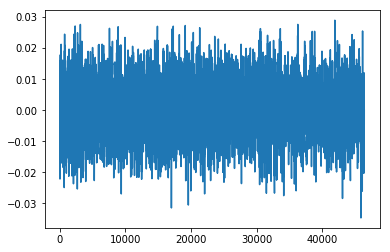

Normalize After


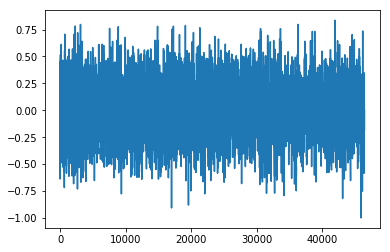

Mask:  4410


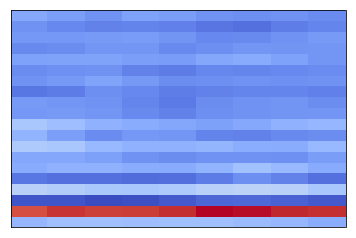

/Users/junhyuckwoo/tensorflow/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


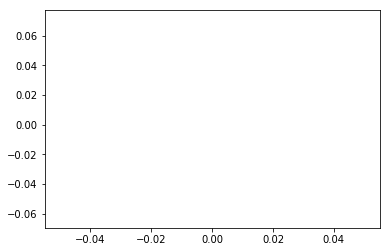

0  MFCC is made
mfcc[ 0 ] shape:  (20, 9)
0 FFT is made


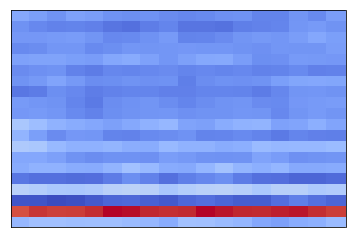

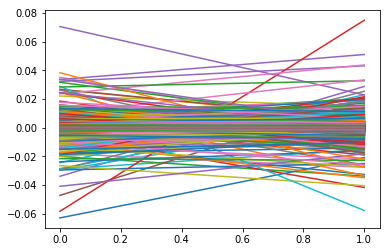

2205  MFCC is made
mfcc[ 2205 ] shape:  (20, 18)
2205 FFT is made


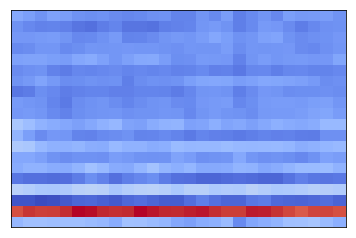

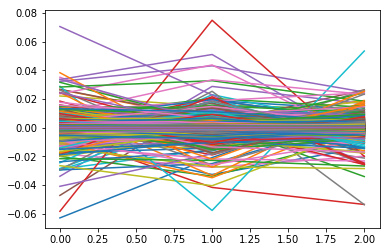

4410  MFCC is made
mfcc[ 4410 ] shape:  (20, 27)
4410 FFT is made


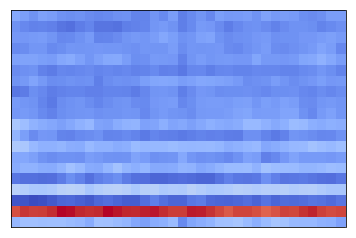

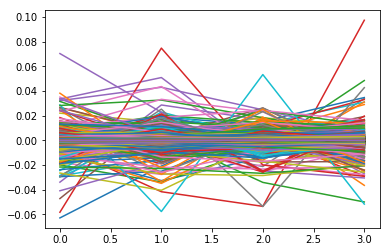

6615  MFCC is made
mfcc[ 6615 ] shape:  (20, 36)
6615 FFT is made


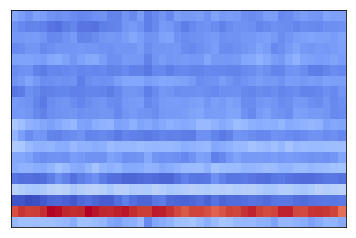

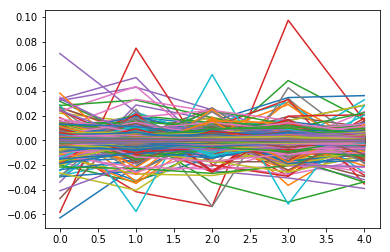

8820  MFCC is made
mfcc[ 8820 ] shape:  (20, 45)
8820 FFT is made


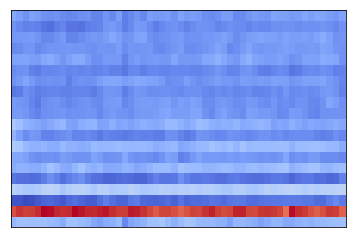

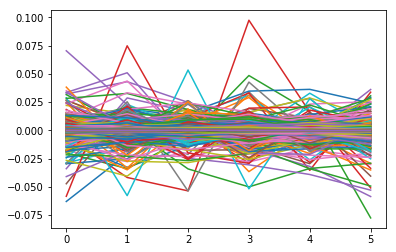

11025  MFCC is made
mfcc[ 11025 ] shape:  (20, 54)
11025 FFT is made


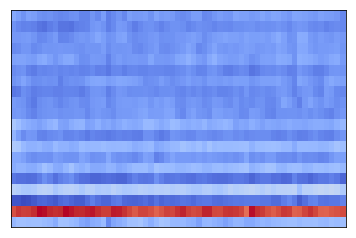

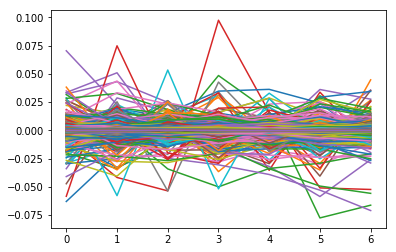

13230  MFCC is made
mfcc[ 13230 ] shape:  (20, 63)
13230 FFT is made


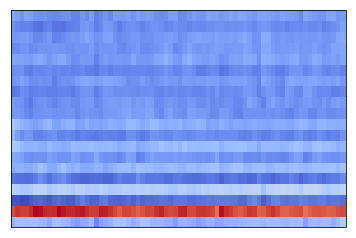

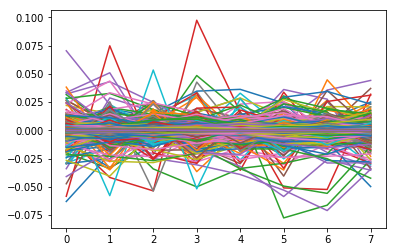

15435  MFCC is made
mfcc[ 15435 ] shape:  (20, 72)
15435 FFT is made


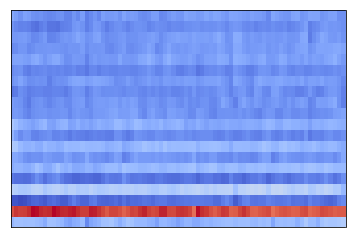

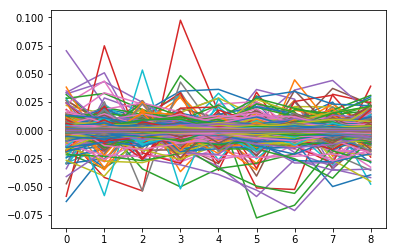

17640  MFCC is made
mfcc[ 17640 ] shape:  (20, 81)
17640 FFT is made


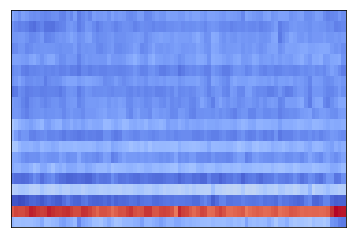

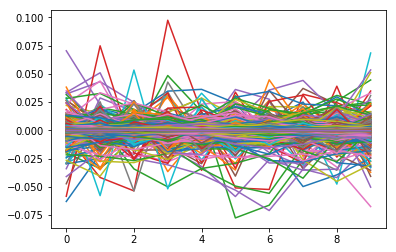

19845  MFCC is made
mfcc[ 19845 ] shape:  (20, 90)
19845 FFT is made


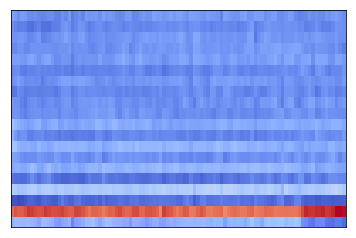

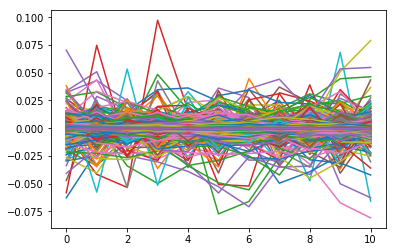

22050  MFCC is made
mfcc[ 22050 ] shape:  (20, 99)
22050 FFT is made


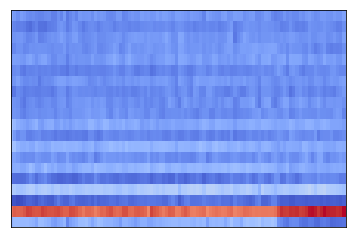

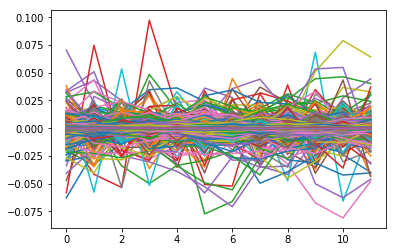

24255  MFCC is made
mfcc[ 24255 ] shape:  (20, 108)
24255 FFT is made


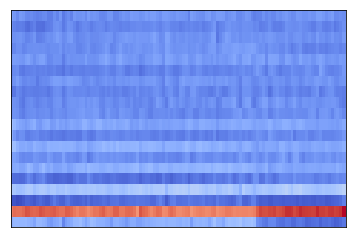

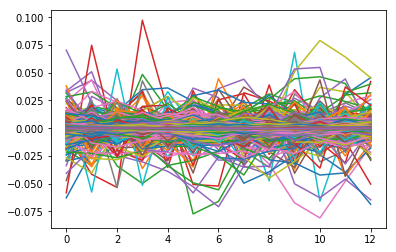

26460  MFCC is made
mfcc[ 26460 ] shape:  (20, 117)
26460 FFT is made


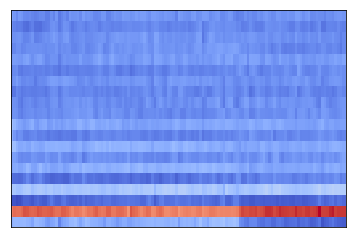

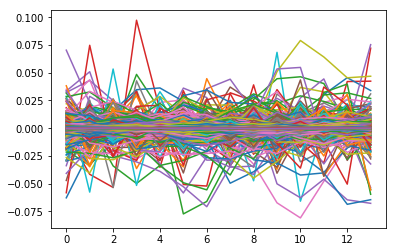

28665  MFCC is made
mfcc[ 28665 ] shape:  (20, 126)
28665 FFT is made


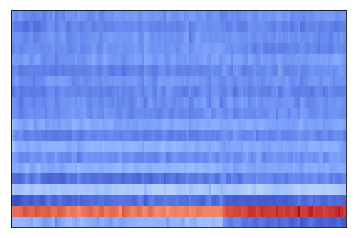

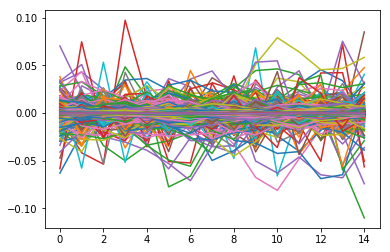

30870  MFCC is made
mfcc[ 30870 ] shape:  (20, 135)
30870 FFT is made


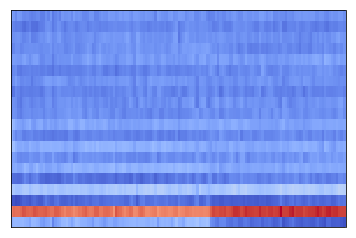

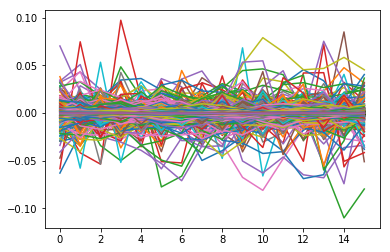

33075  MFCC is made
mfcc[ 33075 ] shape:  (20, 144)
33075 FFT is made


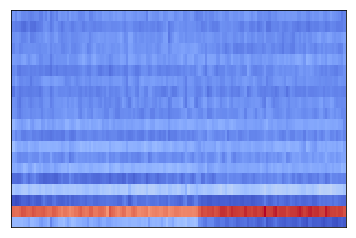

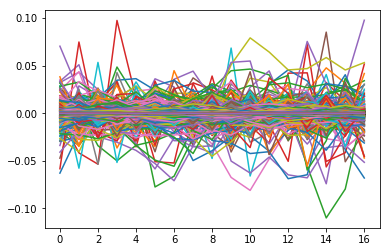

35280  MFCC is made
mfcc[ 35280 ] shape:  (20, 153)
35280 FFT is made


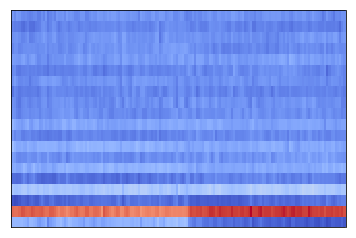

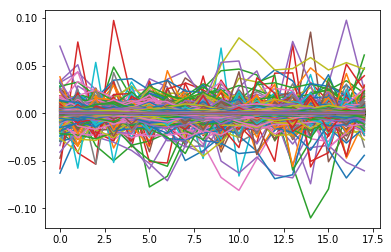

37485  MFCC is made
mfcc[ 37485 ] shape:  (20, 162)
37485 FFT is made


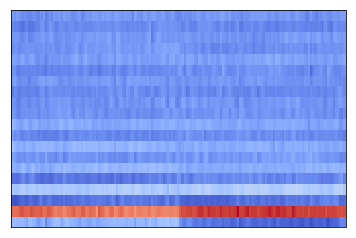

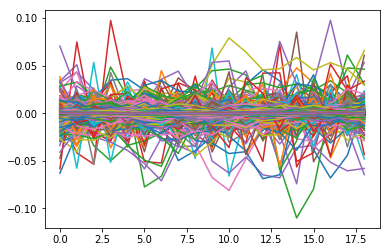

39690  MFCC is made
mfcc[ 39690 ] shape:  (20, 171)
39690 FFT is made


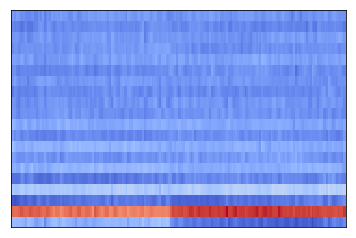

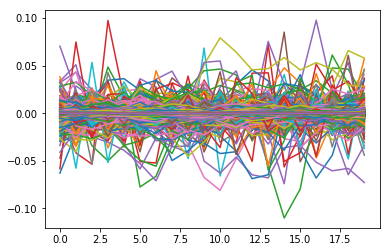

41895  MFCC is made
mfcc[ 41895 ] shape:  (20, 180)
41895 FFT is made


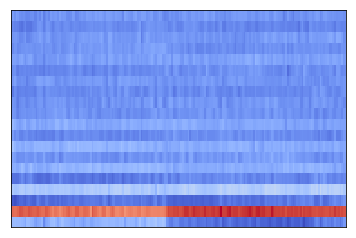

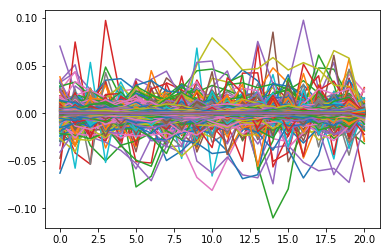

44100  MFCC is made
mfcc[ 44100 ] shape:  (20, 185)
44100 FFT is made


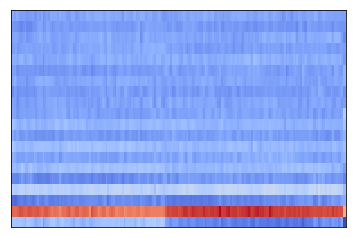

ValueError: setting an array element with a sequence.

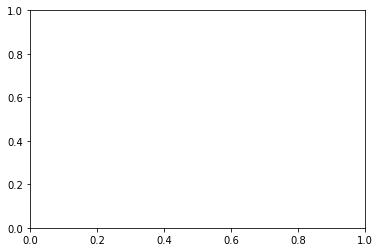

In [53]:
load = Sound("../../soundData/0720A/load/", "wav")
load.load()
load.dataCutting()
load.preProcess()
unload = Sound("../../soundData/0720A/unload/", "wav")
unload.load()
unload.dataCutting()

Data path:  ../../soundData/0720A/load/
Extension:  wav
Data number:  3
Data names:  []
Raw data set:  [array([-6.3510917e-08, -7.5663841e-08,  2.8437177e-07, ...,
       -1.3762871e-02, -1.3829318e-02,  0.0000000e+00], dtype=float32), array([ 1.2365228e-07, -8.7184702e-08,  2.1357669e-08, ...,
        2.1994899e-03,  3.2786088e-04, -1.7541336e-03], dtype=float32), array([-1.00511166e-07,  3.01847010e-08,  8.27704270e-08, ...,
       -3.42537765e-03, -6.56235451e-03,  0.00000000e+00], dtype=float32)]
Sampling Rate:  22050
0 Cut sound is made
1 Cut sound is made
2 Cut sound is made
Normalize Before


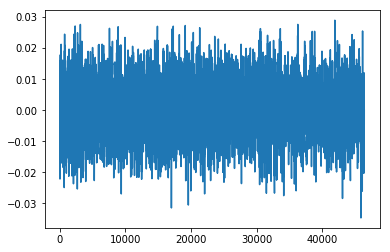

Normalize After


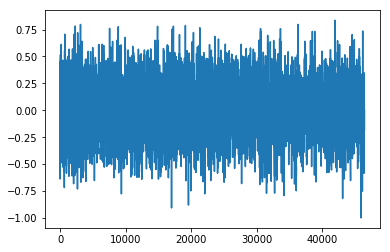

/Users/junhyuckwoo/tensorflow/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


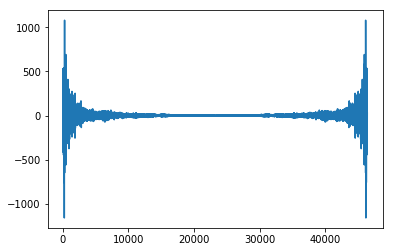

In [26]:
#import scipy.fftpack as fp
from scipy.fftpack import fft

load = Sound("../../soundData/0720A/load/", "wav")
load.load()
x = load.dataCutting()
y = fft(x)
plt.plot(y)
plt.show()

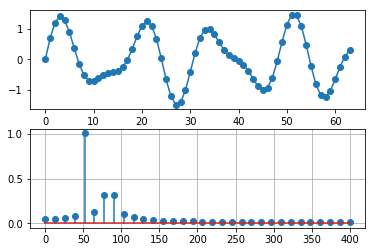

In [37]:
# from scipy.fftpack import fft
import scipy.fftpack as ft
import numpy as np

N = 64
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

#yf = fft(y, N)
yf = np.fft.fft(y,N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.subplot(211)
plt.plot(y, 'o-')

plt.subplot(212)
plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()

plt.show()

In [ ]:
sess = tf.session()